In [4]:
import os
import numpy as np
from PIL import Image

In [43]:
class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("L", (self.n_h*self.r, self.n_v*self.r))
        self.cursor = [0,0]    
    
    def right(self):
        self.cursor[0] += self.r
        
    def down(self):
        self.cursor[1] += self.r
        
    def home(self):
        self.cursor[0] = 0
        
    def append_img(self, path):
        try:
            img = Image.open(path).convert('L')
            img = img.resize((self.r, self.r), Image.BILINEAR)
            self.img.paste(img, tuple(self.cursor))
        except:
            # print(f"Not Appended: {path}")
            pass
        
    def save_img(self, path):
        self.img.save(path)

In [44]:
def fontsummary(paths, n_row=50):
    bimg = ImageConcat(n_row, int(len(paths)/n_row), resolution=30)
    i = 0
    while i < len(paths):
        bimg.append_img(paths[i])
        
        if (i != 0) & (i%n_row == 0):
            bimg.home()
            bimg.down()
        else:
            bimg.right()
        i += 1
    return bimg.img

In [45]:
ttffd = "/home/jupyter/ai_font/data/train_ttfs"
pngfd = "/home/jupyter/ai_font/data/train/pngs"

In [54]:
fontnames = sorted([f.replace(".ttf","") for f in os.listdir(ttffd)])

In [55]:
paths = sorted([f"{pngfd}/{f}" for f in os.listdir(pngfd)])

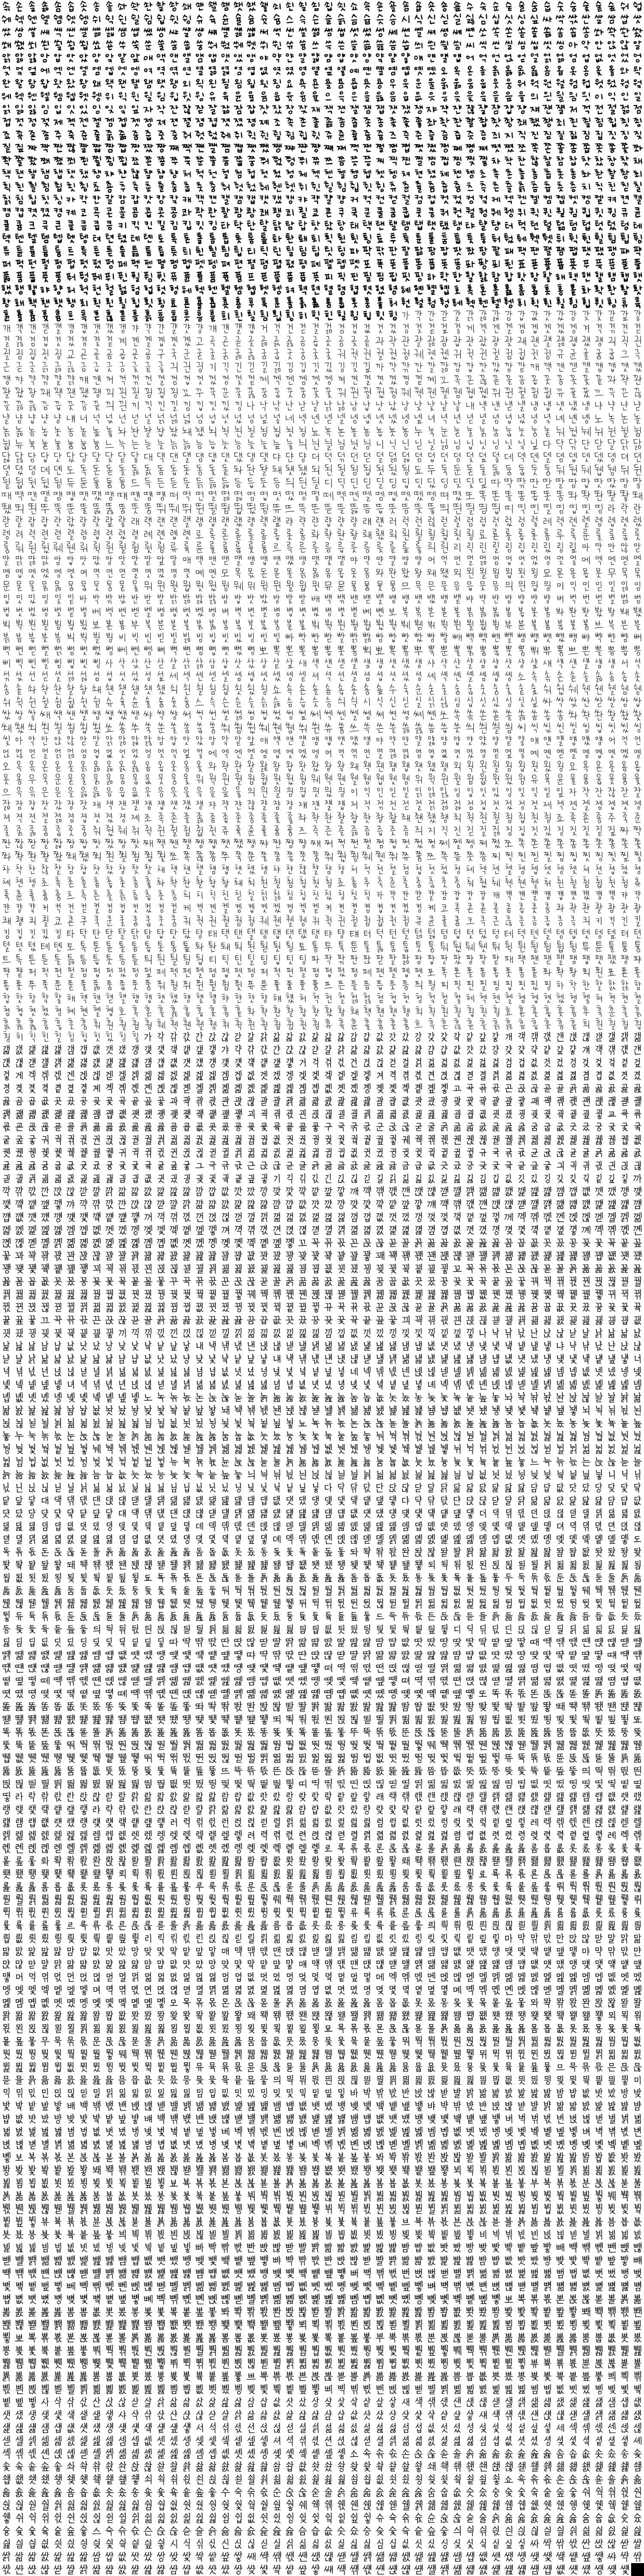

In [57]:
fontsummary(paths[60000:70000])